In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import date

In [3]:
data = pd.read_csv("us-counties.csv")

In [4]:
data = pd.DataFrame(data)
del data['fips']

In [5]:
data.head(8)

,date,county,state,cases,deaths
0,1/21/2020,Snohomish,Washington,1,0
1,1/22/2020,Snohomish,Washington,1,0
2,1/23/2020,Snohomish,Washington,1,0
3,1/24/2020,Cook,Illinois,1,0
4,1/24/2020,Snohomish,Washington,1,0
5,1/25/2020,Orange,California,1,0
6,1/25/2020,Cook,Illinois,1,0
7,1/25/2020,Snohomish,Washington,1,0


In [6]:
#End of Febuary Cases use 2020-02-29
febuary_cases = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

febuary_cases = febuary_cases[febuary_cases['date'] == '2/29/2020']

febuary_cases.head()

,date,county,state,cases,deaths
376,2/29/2020,Maricopa,Arizona,1,0
377,2/29/2020,Humboldt,California,1,0
378,2/29/2020,Los Angeles,California,1,0
379,2/29/2020,Marin,California,1,0
380,2/29/2020,Napa,California,1,0


In [7]:
#End of Second Week of March vs End of Fourth Week of March
march_week_2_df = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

march_week_2_df = march_week_2_df[march_week_2_df['date'] == '3/14/2020']

march_week_2_county = march_week_2_df.groupby(['state', 'county']).sum()

march_week_2_county = march_week_2_county[march_week_2_county['cases'] >= 50]

march_week_2_county

cases  deaths
state         county                      
California    Los Angeles       53       1
              Santa Clara       91       2
Illinois      Cook              51       0
Louisiana     Orleans           53       1
Massachusetts Middlesex         65       0
New York      Nassau            79       0
              New York City    269       1
              Westchester      178       0
Washington    King             389      36
              Snohomish        154       3

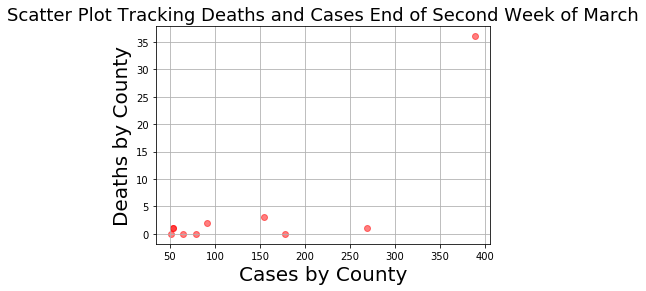

In [30]:
#Start with a scatter plot for second week and fourth week of March
plt.scatter('cases','deaths', alpha = 0.5, color = 'red', data=march_week_2_county)

plt.xlabel("Cases by County", size=20)
plt.ylabel("Deaths by County", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of Second Week of March", size=18)

plt.grid()
plt.savefig("Visualizations/Scatter_March_14th_Deaths_vs_Cases_US_County")
plt.show()


In [9]:
march_week_4_df = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

march_week_4_df = march_week_4_df[march_week_4_df["date"] == '3/28/2020']

march_week_4_county = march_week_4_df.groupby(['state', 'county']).sum()

march_week_4_county = march_week_4_county[march_week_4_county['cases'] >= 50]

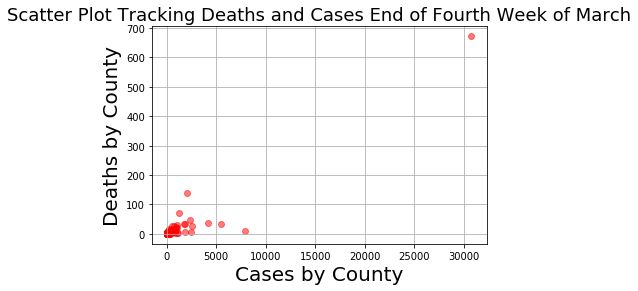

In [31]:
plt.scatter('cases','deaths', alpha = 0.5, color = 'red', data=march_week_4_county)

plt.xlabel("Cases by County", size=20)
plt.ylabel("Deaths by County", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of Fourth Week of March", size=18)

plt.grid()
plt.savefig("Visualizations/Scatter_Plot_March_28th_Tracking_Deaths_vs_Cases_by_County")
plt.show()


In [11]:
#Do it by state
march_week_2_state = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

march_week_2_state = march_week_2_state[march_week_2_state['date'] == '3/14/2020']

march_week_2_state = march_week_2_state.groupby('state').sum()

march_week_2_state = march_week_2_state[march_week_2_state['cases'] >= 50]

march_week_2_state

,cases,deaths
state,,
California,381,5
Colorado,103,2
Florida,70,3
Georgia,65,1
Illinois,66,0
Louisiana,77,1
Massachusetts,138,0
New Jersey,75,2
New York,610,2


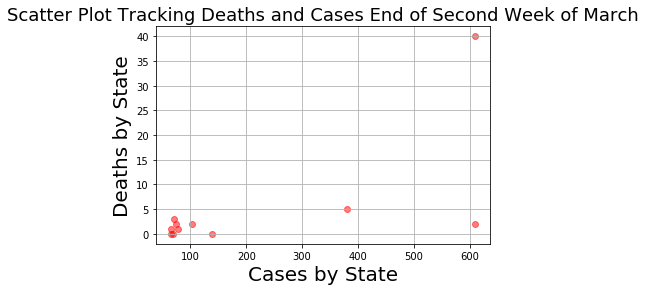

In [32]:
plt.scatter('cases','deaths', alpha = 0.5, color = 'red', data=march_week_2_state)

plt.xlabel("Cases by State", size=20)
plt.ylabel("Deaths by State", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of Second Week of March", size=18)

plt.grid()

plt.savefig("Visualizations/Scatter_Plot_March_14th_Cases_vs_Deaths_By_State.png")

plt.show()

In [13]:
march_week_4_state = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

march_week_4_state = march_week_4_state[march_week_4_state['date'] == '3/28/2020']

march_week_4_state = march_week_4_state.groupby('state').sum()

march_week_4_state = march_week_4_state[march_week_4_state['cases'] >= 50]

march_week_4_state

,cases,deaths
state,,
Alabama,720,4
Alaska,102,1
Arizona,773,12
Arkansas,463,7
California,5567,122
Colorado,2063,43
Connecticut,1524,33
Delaware,214,5
District of Columbia,342,4


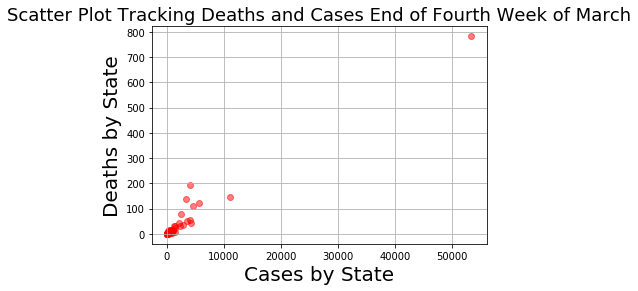

In [33]:
plt.scatter('cases','deaths', alpha = 0.5, color = 'red', data=march_week_4_state)

plt.xlabel("Cases by State", size=20)
plt.ylabel("Deaths by State", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of Fourth Week of March", size=18)

plt.grid()

plt.savefig("Visualizations/Scatter_Plot_March_28th_Cases_vs_Deaths_By_State.png")

plt.show()

In [15]:
#Do cases specific to one state Michigan
march_week_2_mi = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

march_week_2_mi = march_week_2_mi[march_week_2_mi['date'] == '3/14/2020']

march_week_2_mi = march_week_2_mi[march_week_2_mi['state'] == 'Michigan']

march_week_2_mi = march_week_2_mi.groupby('county').sum()

#march_week_2_mi = march_week_2_mi[march_week_2_mi['cases'] >= 50]

march_week_2_mi



,cases,deaths
county,,
Bay,1,0
Charlevoix,1,0
Ingham,1,0
Kent,3,0
Leelanau,1,0
Macomb,2,0
Monroe,1,0
Montcalm,1,0
Oakland,9,0


In [16]:
march_week_4_mi = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

march_week_4_mi = march_week_4_mi[march_week_4_mi['date'] == '3/28/2020']

march_week_4_mi = march_week_4_mi[march_week_4_mi['state'] == 'Michigan']

march_week_4_mi = march_week_4_mi.groupby('county').sum()

#march_week_4_mi = march_week_4_mi[march_week_4_mi['cases'] >= 50]

march_week_4_mi

,cases,deaths
county,,
Allegan,2,0
Barry,1,0
Bay,4,0
Berrien,22,0
Calhoun,11,0
Cass,2,0
Charlevoix,4,0
Chippewa,1,0
Clare,1,0


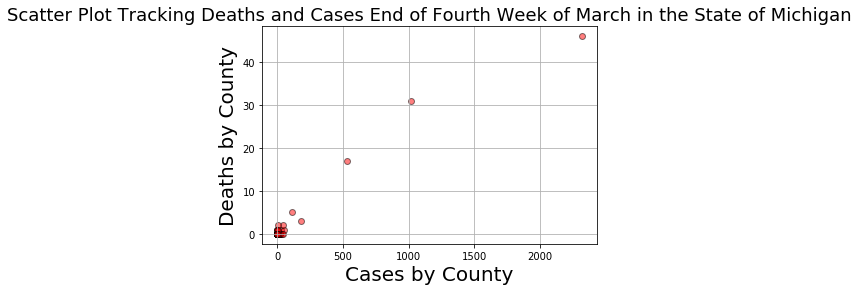

<Figure size 1440x1440 with 0 Axes>

In [34]:
plt.scatter('cases','deaths', alpha = 0.5, color = 'red', edgecolor = 'black',data=march_week_4_mi)

plt.xlabel("Cases by County", size=20)
plt.ylabel("Deaths by County", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of Fourth Week of March in the State of Michigan", size=18)

plt.grid()

plt.figure(figsize=(20,20))
plt.savefig("Visualizations/Scatter_Plot_March_28th_Cases_vs_Deaths_By_Michigan_County.png")

plt.show()

In [18]:
april_week_1_mi = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

april_week_1_mi = april_week_1_mi[april_week_1_mi["date"] == '4/4/2020']

april_week_1_mi = april_week_1_mi[april_week_1_mi['state'] == 'Michigan']

april_week_1_mi = april_week_1_mi.groupby('county').sum()

#april_week_1_mi = april_week_1_mi[april_week_1_mi['cases'] >= 50]

april_week_1_mi.head()

,cases,deaths
county,,
Allegan,10,0
Antrim,4,0
Arenac,3,0
Barry,5,0
Bay,24,0


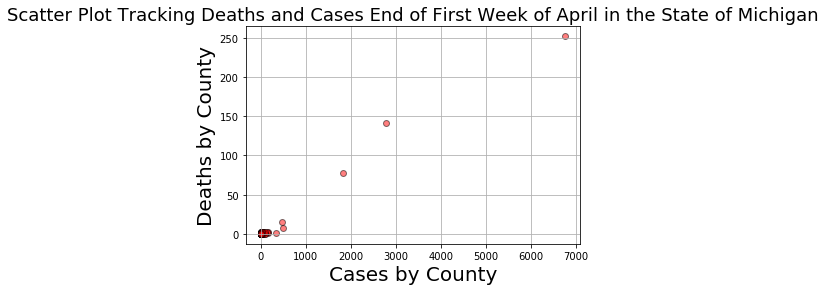

In [27]:
plt.scatter('cases','deaths', alpha = 0.5, color = 'red', edgecolor = 'black', data=april_week_1_mi)

plt.xlabel("Cases by County", size=20)
plt.ylabel("Deaths by County", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of First Week of April in the State of Michigan", size=18)
plt.savefig("Visualizations/Scatter_Plot_April_04th_Cases_vs_Deaths_By_Michigan_County.png")  
### put plt.savefig BEFORE plt.show or else it won't show up in the Visualizations folder
plt.grid()

plt.show()



In [22]:
#Bubble chart where size compares the change in cases

#Size in bubbles correlate to change in percentage of cases by county
percent_increase_cases = ((april_week_1_mi['cases'] - march_week_4_mi['cases'])/march_week_4_mi['cases']) * 100


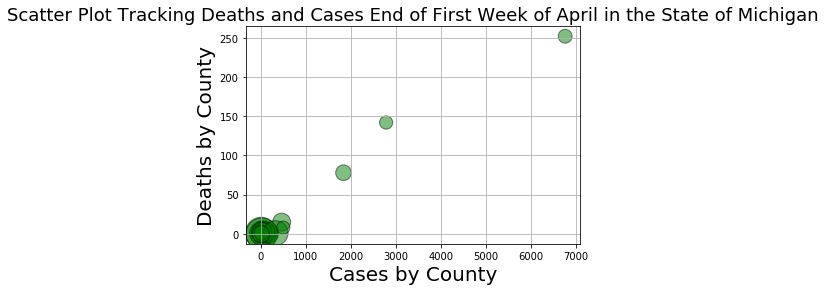

In [28]:
plt.scatter('cases', 'deaths', alpha = 0.5, color = 'green', edgecolor = 'black', s=percent_increase_cases, data = april_week_1_mi)

plt.xlabel("Cases by County", size=20)
plt.ylabel("Deaths by County", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of First Week of April in the State of Michigan", size=18)

plt.grid()
plt.savefig("Visualizations/Bubble_Plot_Correlating_to_Inc_in_Cases_April_04th_Cases_vs_Deaths_By_Michigan_County.png")

plt.show()



In [25]:
#Size of scatter relates to changes in deaths by county in Michigan
percent_inc_deaths = ((april_week_1_mi['deaths'] - march_week_4_mi['deaths'])/march_week_4_mi['deaths']) * 100

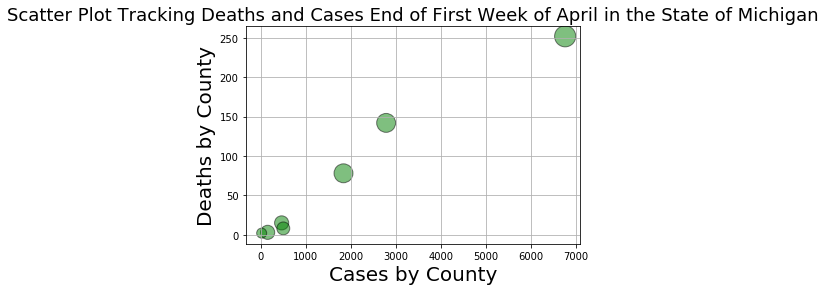

In [29]:
plt.scatter('cases', 'deaths', alpha = 0.5, color = 'green', edgecolor = 'black', s=percent_inc_deaths, data = april_week_1_mi)

plt.xlabel("Cases by County", size=20)
plt.ylabel("Deaths by County", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of First Week of April in the State of Michigan", size=18)

plt.grid()

plt.savefig("Visualizations/Bubble_Plot_II_Correlating_to_Inc_in_Deaths_April_04th_Cases_vs_Deaths_By_Michigan_County.png")

plt.show()